In [2]:
import pandas as pd 
df = pd.read_csv('.\AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


1. Vẽ biểu đồ cột cho neighborhood group

In [35]:
import matplotlib.pyplot as plt
df_nei_gr = df["neighbourhood_group"].value_counts()
df_nei_gr

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [14]:
X = df_nei_gr.index.to_numpy()
y = df_nei_gr.to_numpy()
print(X)
print(y)

['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
[21661 20104  5666  1091   373]


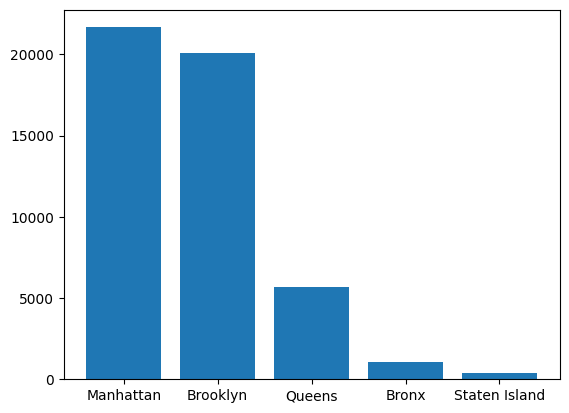

In [15]:
plt.bar(X, y)
plt.show()

2. tạo histogram cho neighbourhood

In [39]:
df_nei = df["neighbourhood"].value_counts()
df_nei

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

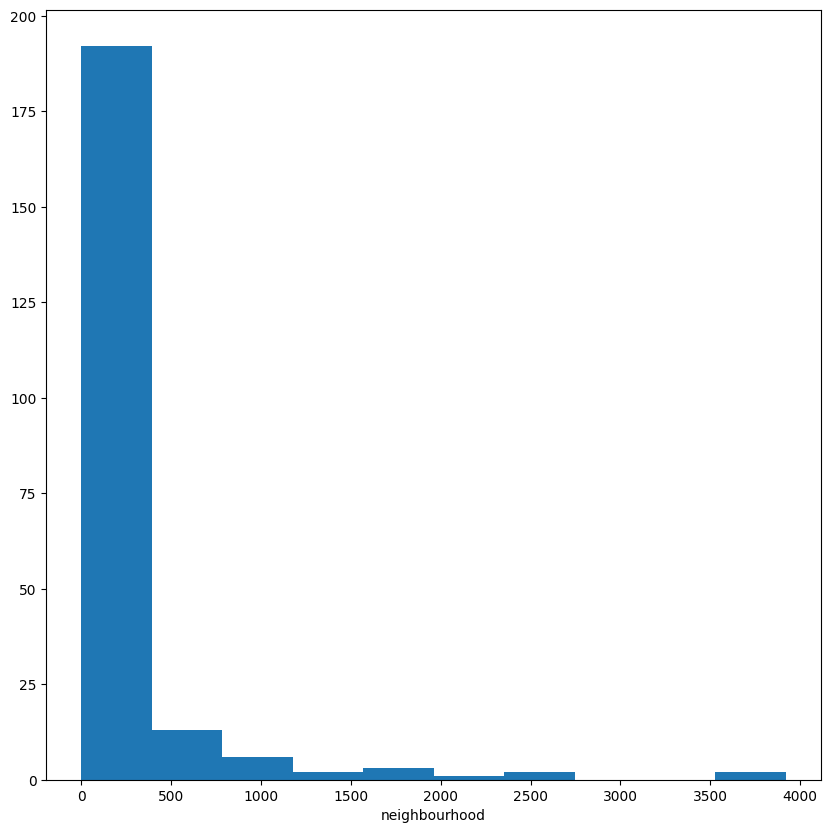

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(df2.to_numpy())
plt.xlabel("neighbourhood")
plt.show()

3. Biểu diễn mối liên hệ giữa neighbourgroup và Availability của các phòng

In [36]:
df_avai = df["availability_365"]
df_avai

0        365
1        355
2        365
3        194
4          0
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 48895, dtype: int64

4. Vẽ bản đồ (scatter plot) của neighborhood dựa theo tọa độ lat lon

In [37]:
df_lat = df["latitude"]
df_lat

0        40.64749
1        40.75362
2        40.80902
3        40.68514
4        40.79851
           ...   
48890    40.67853
48891    40.70184
48892    40.81475
48893    40.75751
48894    40.76404
Name: latitude, Length: 48895, dtype: float64

In [38]:
df_lon = df["longitude"]
df_lon

0       -73.97237
1       -73.98377
2       -73.94190
3       -73.95976
4       -73.94399
           ...   
48890   -73.94995
48891   -73.93317
48892   -73.94867
48893   -73.99112
48894   -73.98933
Name: longitude, Length: 48895, dtype: float64

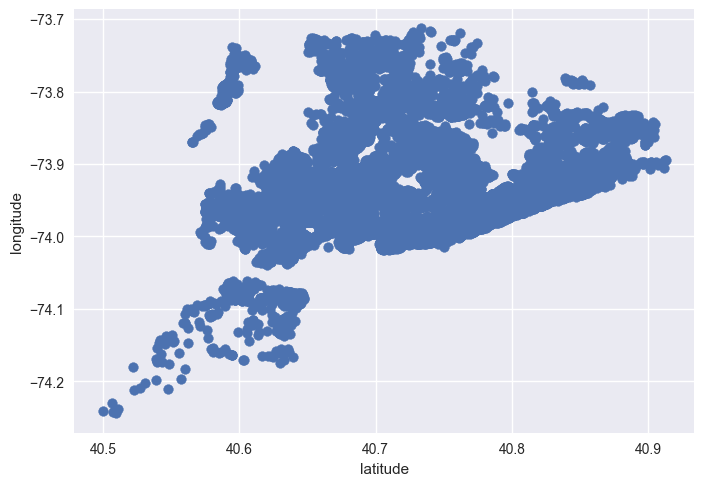

In [52]:
plt.scatter(df_lat.to_numpy(), df_lon.to_numpy())
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

5. Sử dụng heatmap để biểu diễn mối quan hệ (correlation) giữa tất cả các thuộc tính trong dữ liệu

In [ ]:
num_df= df.select_dtypes(['float', 'int']).drop(['reviews_per_month'], axis=1)
obj_df = df.select_dtypes(['object']).drop(['last_review'], axis=1)
obj_df

In [ ]:
num_df

In [57]:
obj_arr=obj_df.columns.to_numpy()
obj_arr

array(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
one = preprocessing.OneHotEncoder()
  
for i in obj_arr:
   
    obj_df[i] = le.fit_transform(obj_df[i])
    
print(obj_df)

In [ ]:
df_encoder = pd.concat((obj_df, num_df), axis=1)
df_encoder

In [2]:
def normailize(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype != object:
            min = df[key].min()
            max = df[key].max()
            df[key] = (df[key] - min)/(max-min)
            df[key] = df[key].round(decimals=4)
    return df

NameError: name 'pd' is not defined

In [1]:
df_norm = normailize(df_encoder.head(14))
data = df_norm.to_numpy()
data.shape

NameError: name 'normailize' is not defined

In [80]:
df_norm.to_numpy()

array([[0.2573, 0.4356, 0.25  , ..., 0.0143, 0.0153, 1.    ],
       [0.7819, 0.4178, 0.5   , ..., 0.0715, 0.0031, 0.9726],
       [0.9089, 0.254 , 0.5   , ..., 0.    , 0.    , 1.    ],
       ...,
       [0.8864, 0.3722, 0.5   , ..., 0.    , 0.    , 0.074 ],
       [0.0537, 0.8898, 0.5   , ..., 0.    , 0.0153, 0.0055],
       [0.9297, 0.1718, 0.5   , ..., 0.    , 0.    , 0.063 ]])

import seaborn as sns
plt.style.use("seaborn")
sns.heatmap(df_norm.to_numpy(), linewidths=0.3, annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()